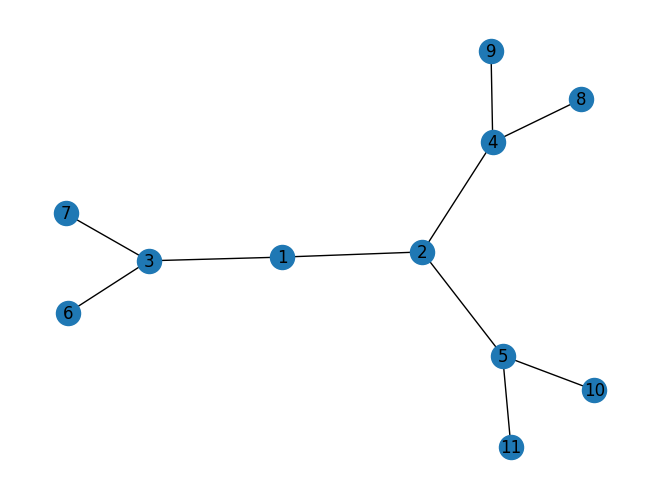

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (4, 8), (4, 9), (5, 10), (5, 11)])
nx.draw(G, with_labels=True)
plt.show()

In [1]:
adj = dict()
with open('3980.edges', 'r') as f:
  lines = [[int(words) for words in line.split()] for line in f.readlines()]

for edge in lines:
  a, b = edge
  if a in adj:
    adj[a].append(b)
  else:
    adj[a] = [b]

print(adj)

FileNotFoundError: [Errno 2] No such file or directory: '3980.edges'

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# 1. Leer el archivo CSV
df = pd.read_csv('Indicadores_de_Cobertura_en_el_Servicio_de_Agua_Potable_en_el_Departamento_de_Cusco_2016_2019.csv')
df.columns = df.columns.str.strip()
# 2. Filtrar por una provincia (por ejemplo, 'ProvinciaX')
provincia_filtrada = df[df['PROVINCIA'] == 'ACOMAYO']

# 3. Crear el grafo usando NetworkX
G = nx.Graph()

# 4. Añadir nodos y aristas
for _, row in provincia_filtrada.iterrows():
    distrito1 = row['ACOMAYO']
    distrito2 = row['ACOPIA']
    G.add_node(distrito1)
    G.add_node(distrito2)
    G.add_edge(distrito1, distrito2)  # Conexión entre los distritos

# 5. Dibujar el grafo
nx.draw(G, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
plt.show()

print(df.columns)

KeyError: 'ACOMAYO'

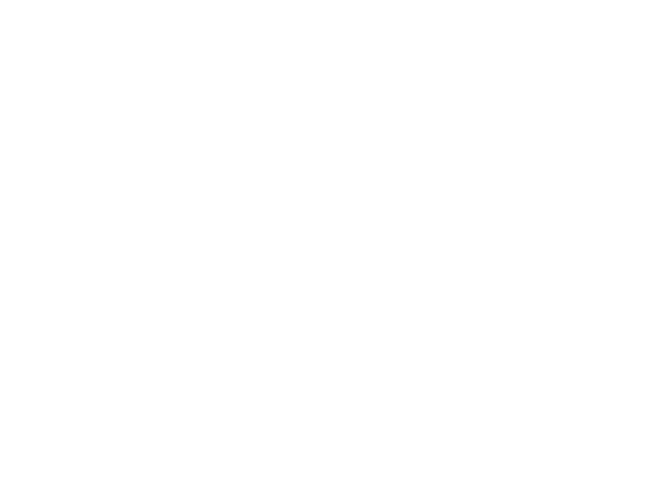

In [13]:
G = nx.Graph()

for node in adj.keys():
  G.add_node(node)

edges = set()

for v, nbs in adj.items():
  for nb in nbs:
    if (nb, v) not in edges or (v, nb) not in edges:
      edges.add((v, nb))
      G.add_edge(v, nb)

pos = nx.spring_layout(G, k=1, iterations=100)

nx.draw(G, node_size=50, with_labels=False)
plt.show()

In [2]:
from pyvis.network import Network
from IPython.display import HTML

In [18]:
net = Network(notebook=True, cdn_resources='in_line')

for node in adj.keys():
  net.add_node(node, label=str(node))

edges = set()

for v, nbs in adj.items():
  for nb in nbs:
    if (nb, v) not in edges or (v, nb) not in edges:
      edges.add((v, nb))
      net.add_edge(v, nb)

net.save_graph('g.html')
HTML(filename='g.html')

UnicodeEncodeError: 'charmap' codec can't encode characters in position 263607-263621: character maps to <undefined>

In [3]:
def bfs(adj, start, dest):
  queue = [start]
  visited = set()
  parent = dict()
  while queue:
    node = queue.pop(0)
    if node == dest:
      break
    if node in visited:
      continue
    visited.add(node)
    for nb in adj[node]:
      if nb not in parent:
        parent[nb] = node
      if nb not in visited:
        queue.append(nb)

  path = []
  node = dest
  while node != start:
    path.append((parent[node], node))
    node = parent[node]
  path.reverse()
  return path

In [4]:
bfs(adj, 4002, 4021)

KeyError: 4002

In [5]:
net = Network(notebook=True, cdn_resources='in_line')

for node in adj.keys():
  net.add_node(node, label=str(node))

path = set(bfs(adj, 4002, 4032))
edges = set()

for v, nbs in adj.items():
  for nb in nbs:
    if (nb, v) not in edges or (v, nb) not in edges:
      edges.add((v, nb))
      net.add_edge(v, nb, color='red' if (v, nb) in path or (nb, v) in path else 'grey')

net.save_graph('g.html')
HTML(filename='g.html')

KeyError: 4002

In [7]:
from random import randint

wadj = dict()
for v, nbs in adj.items():
  wadj[v] = [(u, randint(1, 10)) for u in nbs if u < v]


# si u -w-> v
# ... v -w-> u
for v, nbs in wadj.items():
  for nb, w in nbs:
    if nb not in wadj:
      wadj[nb] = [(v, w)]
    else:
      wadj[nb].append((v, w))

print(wadj)

{}


In [8]:
net = Network(notebook=True, cdn_resources='in_line')

for node in wadj.keys():
  net.add_node(node, label=str(node))

edges = set()

for v, nbs in wadj.items():
  for nb, w in nbs:
    if (nb, v) not in edges or (v, nb) not in edges:
      edges.add((v, nb))
      net.add_edge(v, nb, label=str(w))

net.save_graph('g.html')
HTML(filename='g.html')

UnicodeEncodeError: 'charmap' codec can't encode characters in position 263607-263621: character maps to <undefined>

In [9]:
import heapq

def dijkstra(adj, start, dest):
  dist = {node: float('inf') for node in adj}
  prev = {node : None for node in adj}
  dist[start] = 0
  pq = [(0, start)]

  while pq and dist[dest] == float('inf'):
    d, u = heapq.heappop(pq)

    if d > dist[u]:
      continue

    for v, w in adj.get(u, []):
      if dist[u] + w < dist[v]:
        dist[v] = dist[u] + w
        prev[v] = u
        heapq.heappush(pq, (dist[v], v))

  path = []
  curr = dest
  while curr != start:
    path.append((prev[curr], curr))
    curr = prev[curr]
  path.reverse()

  return path, dist[dest]

dijkstra(wadj, 4002, 3999)


KeyError: 3999

In [10]:
net = Network(notebook=True, cdn_resources='in_line')

for node in wadj.keys():
  net.add_node(node, label=str(node))

path, dist = dijkstra(wadj, 4014, 4028)
path = set(path)
edges = set()

for v, nbs in wadj.items():
  for nb, w in nbs:
    if (nb, v) not in edges or (v, nb) not in edges:
      edges.add((v, nb))
      net.add_edge(v, nb, label=str(w), color='red' if (v, nb) in path or (nb, v) in path else 'grey')

net.save_graph('g.html')
print('min dist:', dist)
HTML(filename='g.html')

KeyError: 4028

In [11]:
def find(parent, i):
  if parent[i] == i:
    return i
  parent[i] = find(parent, parent[i])
  return parent[i]

def union(parent, rank, x, y):
  xroot = find(parent, x)
  yroot = find(parent, y)
  if rank[xroot] < rank[yroot]:
    parent[xroot] = yroot
  elif rank[xroot] > rank[yroot]:
    parent[yroot] = xroot
  else:
    parent[yroot] = xroot
    rank[xroot] += 1

def kruskal(adj):
  parent = {node: node for node in adj}
  rank = {node: 0 for node in adj}
  edges = []
  for u in adj:
    for v, w in adj[u]:
      edges.append((w, u, v))
  edges.sort()
  mst = []
  for w, u, v in edges:
    if find(parent, u) != find(parent, v):
      union(parent, rank, u, v)
      mst.append((u, v, w))
  return mst

In [12]:
mst = dict()

for v, u, w in kruskal(wadj):
  if v not in mst:
    mst[v] = [(u, w)]
  else:
    mst[v].append((u, w))

print(mst)

{}


In [13]:
net = Network(notebook=True, cdn_resources='in_line')

for node in mst.keys():
  net.add_node(node, label=str(node))
  for nb, w in mst[node]:
    net.add_node(nb, label=str(nb))

edges = set()

for v, nbs in mst.items():
  for nb, w in nbs:
    if (nb, v) not in edges or (v, nb) not in edges:
      edges.add((v, nb))
      net.add_edge(v, nb, label=str(w))

net.save_graph('g.html')
HTML(filename='g.html')

UnicodeEncodeError: 'charmap' codec can't encode characters in position 263607-263621: character maps to <undefined>

In [14]:
dadj = dict()
with open('3980.edges', 'r') as f:
  lines = [[int(words) for words in line.split()] for line in f.readlines()]

for edge in lines:
  if randint(0, 2) > 0:
    continue
  a, b = edge
  if a in dadj:
    dadj[a].append(b)
  else:
    dadj[a] = [b]

print(dadj)

FileNotFoundError: [Errno 2] No such file or directory: '3980.edges'

In [15]:
net = Network(notebook=True, directed=True, cdn_resources='in_line')

for node, nbs in dadj.items():
  net.add_node(node, label=str(node))
  for nb in nbs:
    net.add_node(nb, label=str(nb))

edges = set()

for v, nbs in dadj.items():
  for nb in nbs:
    if (nb, v) not in edges or (v, nb) not in edges:
      edges.add((v, nb))
      net.add_edge(v, nb)

net.save_graph('g.html')
HTML(filename='g.html')

UnicodeEncodeError: 'charmap' codec can't encode characters in position 263607-263621: character maps to <undefined>

In [ ]:
def dfs(graph, node, visited, stack):
    visited.add(node)
    for neighbor in graph.get(node, []):
        if neighbor not in visited:
            dfs(graph, neighbor, visited, stack)
    stack.append(node)

def dfs_transpose(graph, node, visited, component):
    visited.add(node)
    component.append(node)
    for neighbor in graph.get(node, []):
        if neighbor not in visited:
            dfs_transpose(graph, neighbor, visited, component)

def kosaraju(graph):
    num_nodes = len(set([node for node in graph] + [nb for nbs in graph.values() for nb in nbs]))
    visited = set()
    stack = []

    for node in graph:
        if node not in visited:
            dfs(graph, node, visited, stack)

    transpose_graph = {}
    for u in graph:
        for v in graph.get(u, []):
            if v not in transpose_graph:
                transpose_graph[v] = []
            transpose_graph[v].append(u)

    visited = set()
    strongly_connected_components = []

    while stack:
        node = stack.pop()
        if node not in visited:
            component = []
            dfs_transpose(transpose_graph, node, visited, component)
            strongly_connected_components.append(component)

    return strongly_connected_components

scc = kosaraju(dadj)
print(scc, len(scc))

[[4007], [4006], [4033], [4025, 4016], [4029], [4001], [3996], [4028], [3985, 3995], [4013], [4032], [4027], [4002, 4023, 3982, 4021, 3997, 3994, 4009, 4030, 4000, 4026, 3986, 4014, 4017, 3992, 4019, 3981, 3998, 3988, 4034], [4003], [4005], [3999], [4036], [4018], [4020, 4031, 594, 4004, 4038], [3989, 4011], [4037]] 21


In [16]:
hex_colors = [
    "#FF0000",  # Red
    "#00FF00",  # Green
    "#0000FF",  # Blue
    "#FFFF00",  # Yellow
    "#000000",  # Black
    "#FFFFFF",  # White
    "#808080",  # Gray
    "#FFA500",  # Orange
    "#800080",  # Purple
    "#FFC0CB",  # Pink
    "#00FFFF",  # Cyan
    "#FF00FF",  # Magenta
    "#A52A2A",  # Brown
    "#FFD700",  # Gold
    "#C0C0C0",  # Silver
    "#8B4513",  # SaddleBrown
    "#6A5ACD",  # SlateBlue
    "#B22222",  # FireBrick
    "#FF6347",  # Tomato
    "#ADFF2F",  # GreenYellow
    "#20B2AA"   # LightSeaGreen
]

scc = kosaraju(dadj)
color = dict()
for i, comp in enumerate(scc):
  for node in comp:
    color[node] = hex_colors[i % len(hex_colors)]
print(color)

NameError: name 'kosaraju' is not defined

In [17]:
net = Network(notebook=True, directed=True, cdn_resources='in_line')

for node, nbs in dadj.items():
  net.add_node(node, label=str(node), color=color[node])
  for nb in nbs:
    net.add_node(nb, label=str(nb), color=color[nb])

edges = set()

for v, nbs in dadj.items():
  for nb in nbs:
    if (nb, v) not in edges or (v, nb) not in edges:
      edges.add((v, nb))
      net.add_edge(v, nb)

net.save_graph('g.html')
HTML(filename='g.html')

UnicodeEncodeError: 'charmap' codec can't encode characters in position 263607-263621: character maps to <undefined>

In [ ]:
mf = dict()
with open('max_flow.txt', 'r') as f:
  lines = [[int(words) for words in line.split()] for line in f.readlines()]

for edge in lines:
  a, b, w = edge
  if a in mf:
    mf[a].append((b, w))
  else:
    mf[a] = [(b, w)]

print(mf)

{0: [(1, 12), (2, 15), (3, 7), (4, 4)], 1: [(2, 6), (3, 18), (4, 11), (5, 3)], 2: [(3, 14), (4, 8), (5, 17), (6, 9)], 3: [(5, 4), (6, 16)], 4: [(5, 19), (6, 2), (7, 13)], 5: [(7, 11), (8, 6), (18, 2)], 6: [(8, 19), (9, 8)], 7: [(10, 16)], 8: [(10, 14)], 9: [(11, 7)], 10: [(11, 15), (12, 3)], 11: [(12, 9)], 12: [(13, 18), (14, 4)], 13: [(15, 12)], 14: [(15, 17)], 15: [(16, 14)], 16: [(17, 6), (19, 2)], 17: [(18, 15)], 18: [(19, 11)]}


In [18]:
net = Network(notebook=True, directed=True, cdn_resources='in_line')

for node, nbs in mf.items():
  net.add_node(node, label=str(node))
  for nb, w in nbs:
    net.add_node(nb, label=str(nb))

edges = set()

for v, nbs in mf.items():
  for nb, w in nbs:
    if (nb, v) not in edges or (v, nb) not in edges:
      edges.add((v, nb))
      net.add_edge(v, nb, label=str(w))

net.save_graph('g.html')
HTML(filename='g.html')

NameError: name 'mf' is not defined

In [19]:
def ford_fulkerson(graph, source, sink):
    flow = 0
    residual_graph = {node: {neighbor: capacity for neighbor, capacity in neighbors}
                     for node, neighbors in graph.items()}

    while True:
        path = bfs(residual_graph, source, sink)
        if not path:
            break

        path_flow = float('inf')
        for u, v in zip(path[:-1], path[1:]):
            path_flow = min(path_flow, residual_graph[u][v])

        for u, v in zip(path[:-1], path[1:]):
            residual_graph[u][v] -= path_flow
            if v in residual_graph and u in residual_graph[v]:
                residual_graph[v][u] += path_flow
            else:
                if v not in residual_graph:
                  residual_graph[v] = dict()
                residual_graph[v][u] = path_flow

        flow += path_flow

    return flow, residual_graph


def bfs(graph, source, sink):
    queue = [(source, [source])]
    visited = set()

    while queue:
        (vertex, path) = queue.pop(0)
        visited.add(vertex)
        for neighbor, capacity in graph.get(vertex, {}).items():
            if neighbor not in visited and capacity > 0:
                if neighbor == sink:
                    return path + [neighbor]
                else:
                    queue.append((neighbor, path + [neighbor]))

    return None


In [ ]:
max_flow, r = ford_fulkerson(mf, 0, 19)
print(max_flow)
print(r)

10
{0: {1: 10, 2: 10, 3: 7, 4: 1}, 1: {2: 6, 3: 18, 4: 11, 5: 1, 0: 2}, 2: {3: 14, 4: 8, 5: 17, 6: 4, 0: 5}, 3: {5: 4, 6: 16}, 4: {5: 19, 6: 2, 7: 10, 0: 3}, 5: {7: 11, 8: 6, 18: 0, 1: 2}, 6: {8: 19, 9: 3, 2: 5}, 7: {10: 13, 4: 3}, 8: {10: 14}, 9: {11: 2, 6: 5}, 10: {11: 15, 12: 0, 7: 3}, 11: {12: 4, 9: 5}, 12: {13: 10, 14: 4, 10: 3, 11: 5}, 13: {15: 4, 12: 8}, 14: {15: 17}, 15: {16: 6, 13: 8}, 16: {17: 0, 19: 0, 15: 8}, 17: {18: 9, 16: 6}, 18: {19: 3, 5: 2, 17: 6}, 19: {18: 8, 16: 2}}


In [20]:
net = Network(notebook=True, directed=True, cdn_resources='in_line')

for node, nbs in mf.items():
  net.add_node(node, label=str(node))
  for nb, w in nbs:
    net.add_node(nb, label=str(nb))

edges = set()

for v, nbs in mf.items():
  for nb, w in nbs:
    if (nb, v) not in edges or (v, nb) not in edges:
      edges.add((v, nb))
      net.add_edge(v, nb, value=w-r[v][nb], label=f"{w-r[v][nb]}/{w}")

net.save_graph('g.html')
HTML(filename='g.html')

NameError: name 'mf' is not defined